# **Step-1: Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# **Step-2: Load the heart dataset**

In [9]:
heart = pd.read_csv("C:/Users/HP/Downloads/archive (3)/heart.csv") 
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Step-3: Explore the data**

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


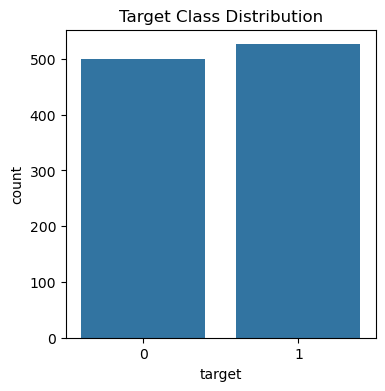

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(x='target', data=heart)
plt.title("Target Class Distribution")
plt.show()

# **Step-4: Split into features and target**

In [22]:
x = heart.drop('target',axis=1)
y = heart['target']

# **Step-5: Train Test split**

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Step-6: Train decision Tree Classifier**

In [30]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

# Predict & Evaluate
y_pred_dt = dtree.predict(x_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **Step-7: Visualize decision tree**

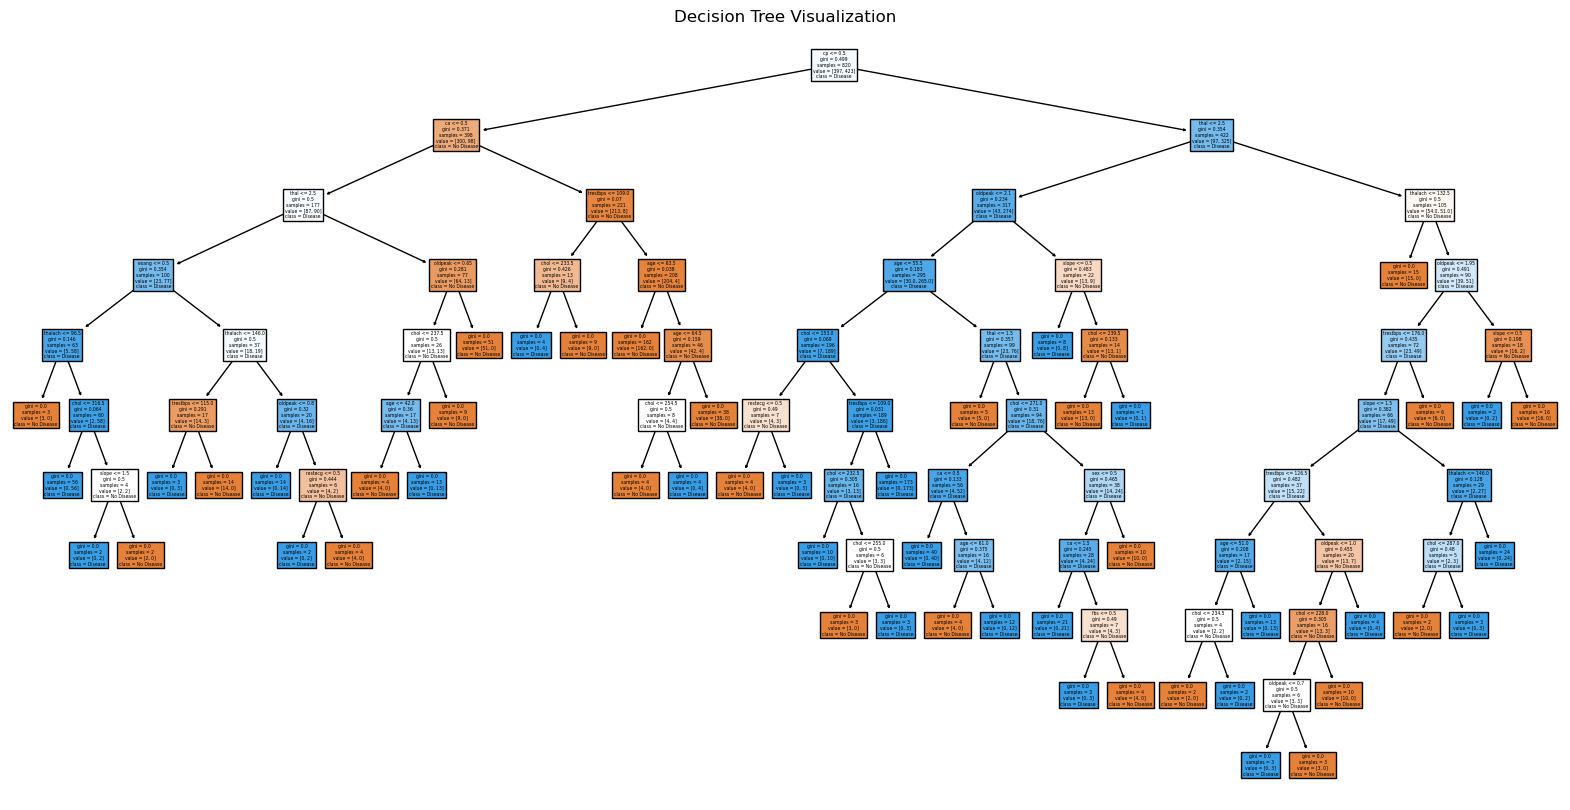

In [35]:
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=x.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.savefig('decision tree.png')
plt.show()

This is the full decision tree built using the training data.

It splits on various features (like ca, thal, cp, etc.) to classify heart disease.

Colored nodes:

🟧 Orange = class 1 (disease),

🟦 Blue = class 0 (no disease).

🔎 Interpretation: The tree is detailed and interpretable, but quite large — pruning or limiting depth can simplify it.

# **Step-8: Analyze overfitting by tree depth**

In [40]:
train_acc = []
test_acc = []

for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    train_acc.append(model.score(x_train, y_train))
    test_acc.append(model.score(x_test, y_test))

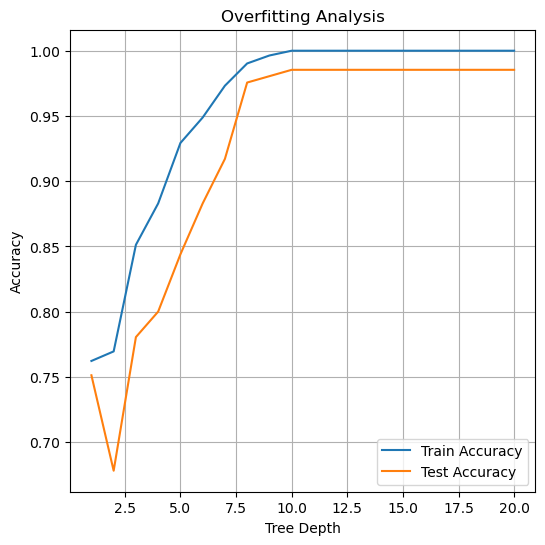

In [46]:
plt.figure(figsize=(6,6))
plt.plot(range(1, 21), train_acc, label="Train Accuracy")
plt.plot(range(1, 21), test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis")
plt.legend()
plt.grid(True)
plt.savefig('overfitting analysis.png')
plt.show()

The plot shows training vs. testing accuracy across different tree depths.

Training accuracy reaches 100% as depth increases — indicating perfect fitting on training data.

Test accuracy peaks around depth 9–10, then plateaus — suggesting deeper trees don't help generalize better.

-->Interpretation: Deeper trees may overfit; a depth of around 9 balances bias and variance well.

# **Step-9: Train Random Forest classifier**

In [50]:
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(x_train, y_train)

# Predict & Evaluate
y_pred_rf = rforest.predict(x_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **Step-10: Feature Importance**

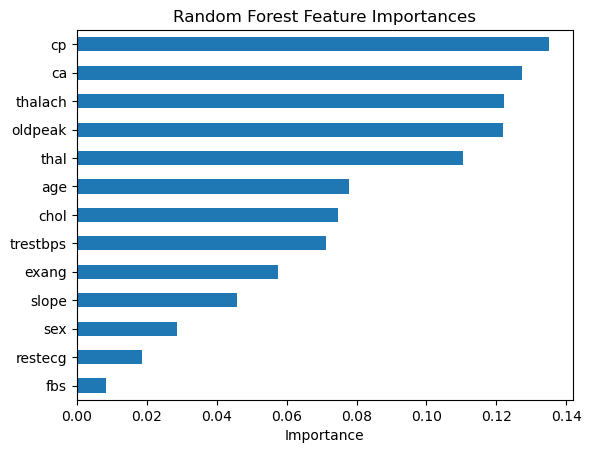

In [55]:
importances = pd.Series(rforest.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', title="Random Forest Feature Importances")
plt.xlabel("Importance")
plt.savefig('feature importance.png')
plt.show()

This bar chart shows which features were most important in predicting heart disease.

Top features:

cp (chest pain type)

ca (number of major vessels)

thalach (max heart rate)

oldpeak (ST depression)

🔎 Interpretation: The model relies heavily on these features for accurate predictions.

# **Step-11: Cross-validation**

In [60]:
cv_score_dt = cross_val_score(dtree, x, y, cv=5)
cv_score_rf = cross_val_score(rforest, x, y, cv=5)

print(f"Decision Tree Cross-Val Accuracy: {cv_score_dt.mean():.4f}")
print(f"Random Forest Cross-Val Accuracy: {cv_score_rf.mean():.4f}")

Decision Tree Cross-Val Accuracy: 1.0000
Random Forest Cross-Val Accuracy: 0.9971
